<a href="https://colab.research.google.com/github/dioz-s/StudyGroup4/blob/main/STP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df= pd.read_csv('https://raw.githubusercontent.com/Ardavaa/GDG-feature-eng-data-prep/refs/heads/main/dataset-penugasan/STP.csv')

df.head(10)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3(Target),index
0,0,GP,F,NaN,U,GT3,A,4.0,-inf,at_home,...,NaN,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0,0
1,1,GP,F,-,U,GT3,T,1.0,1.0,at_home,...,3.0,3.0,-,NaN,3.0,2.0,9.0,-inf,11.0,1
2,2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,...,NaN,2.0,2.0,NaN,NaN,6.0,12.0,13.0,12.0,2
3,3,GP,F,15.0,U,GT3,T,4.0,NaN,health,...,NaN,NaN,1.0,1.0,5.0,0.0,NaN,inf,NaN,3
4,4,GP,F,16.0,U,GT3,T,3.0,3.0,other,...,-inf,2.0,inf,2.0,5.0,0.0,NaN,13.0,13.0,4
5,5,GP,M,16.0,U,LE3,T,4.0,3.0,services,...,4.0,2.0,1.0,NaN,NaN,6.0,12.0,12.0,13.0,5
6,6,GP,M,-inf,U,LE3,T,2.0,2.0,other,...,4.0,4.0,1.0,1.0,3.0,0.0,13.0,12.0,13.0,6
7,7,GP,F,17.0,U,GT3,A,4.0,NaN,other,...,1.0,4.0,NaN,-,1.0,2.0,10.0,13.0,13.0,7
8,8,GP,M,15.0,U,LE3,A,NaN,-,services,...,2.0,2.0,1.0,1.0,inf,0.0,15.0,NaN,17.0,8
9,9,GP,M,15.0,U,GT3,T,NaN,4.0,other,...,5.0,1.0,inf,NaN,NaN,0.0,12.0,12.0,13.0,9


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1044 non-null   int64 
 1   school      1044 non-null   object
 2   sex         1044 non-null   object
 3   age         928 non-null    object
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        919 non-null    object
 8   Fedu        928 non-null    object
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  922 non-null    object
 14  studytime   920 non-null    object
 15  failures    922 non-null    object
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery 

In [29]:
cols_to_remove = ['Unnamed: 0']
df.drop(cols_to_remove, axis=1, inplace=True)

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3(Target),index
0,GP,F,NaN,U,GT3,A,4.0,-inf,at_home,teacher,...,NaN,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0,0
1,GP,F,-,U,GT3,T,1.0,1.0,at_home,other,...,3.0,3.0,-,NaN,3.0,2.0,9.0,-inf,11.0,1
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,NaN,2.0,2.0,NaN,NaN,6.0,12.0,13.0,12.0,2
3,GP,F,15.0,U,GT3,T,4.0,NaN,health,services,...,NaN,NaN,1.0,1.0,5.0,0.0,NaN,inf,NaN,3
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,-inf,2.0,inf,2.0,5.0,0.0,NaN,13.0,13.0,4


In [30]:
print(f'Baris data: {len(df)}')

Baris data: 1044


In [31]:
fix_cols = ['age', 'Medu', 'Fedu', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3(Target)']

for col in fix_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         899 non-null    float64
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        891 non-null    float64
 7   Fedu        897 non-null    float64
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  922 non-null    object 
 13  studytime   920 non-null    object 
 14  failures    922 non-null    object 
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null  

In [18]:
# df['reason'].value_counts()
# df['guardian'].value_counts()
# df['traveltime'].value_counts()
# df['studytime'].value_counts()
# df['failures'].value_counts()

,count
failures,
0.0,690
1.0,98
-inf,31
inf,30
2.0,27
-,25
3.0,21


In [32]:
df.duplicated().sum()

0

In [33]:
df.isna().sum().sort_values(ascending=False)

,0
Medu,153
absences,152
Walc,151
G1,150
health,150
freetime,149
Dalc,148
goout,148
Fedu,147
age,145


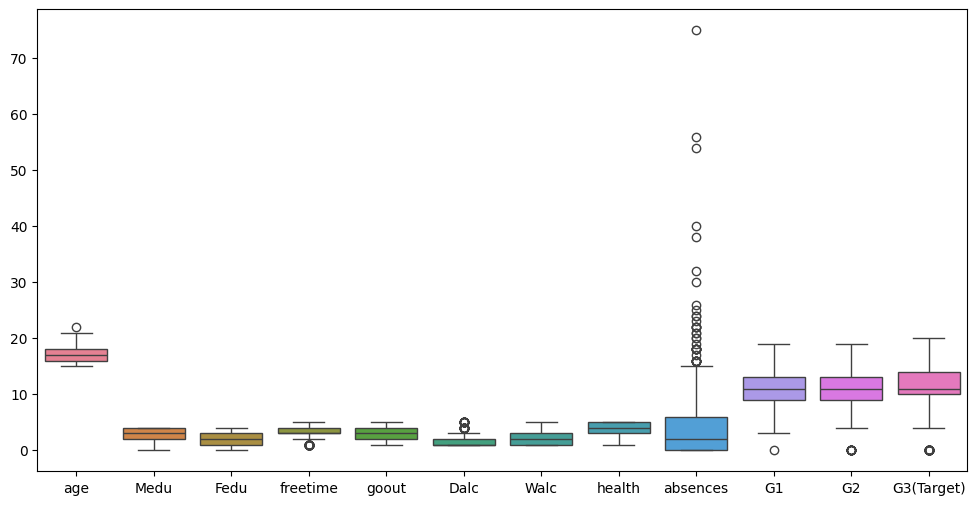

In [34]:
num_cols = ['age', 'Medu', 'Fedu', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3(Target)']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.show()

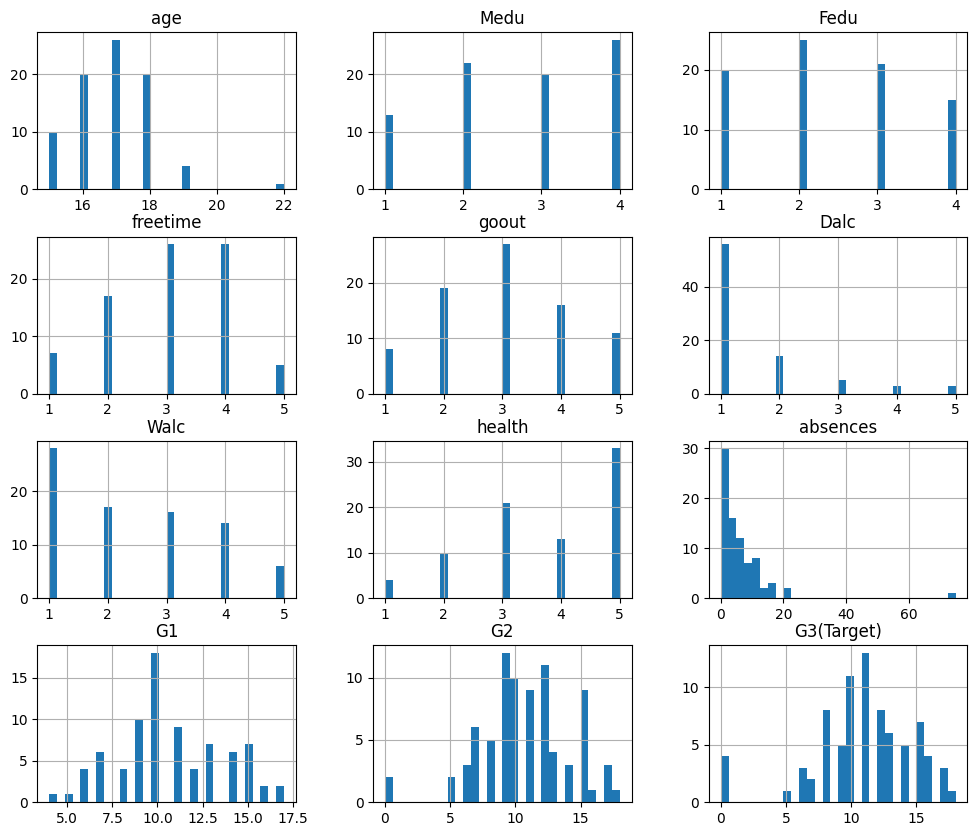

In [35]:
num_cols =  ['age', 'Medu', 'Fedu', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3(Target)']

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(subset=num_cols, inplace=True)

df[num_cols].hist(bins=30, figsize=(12, 10))
plt.show()

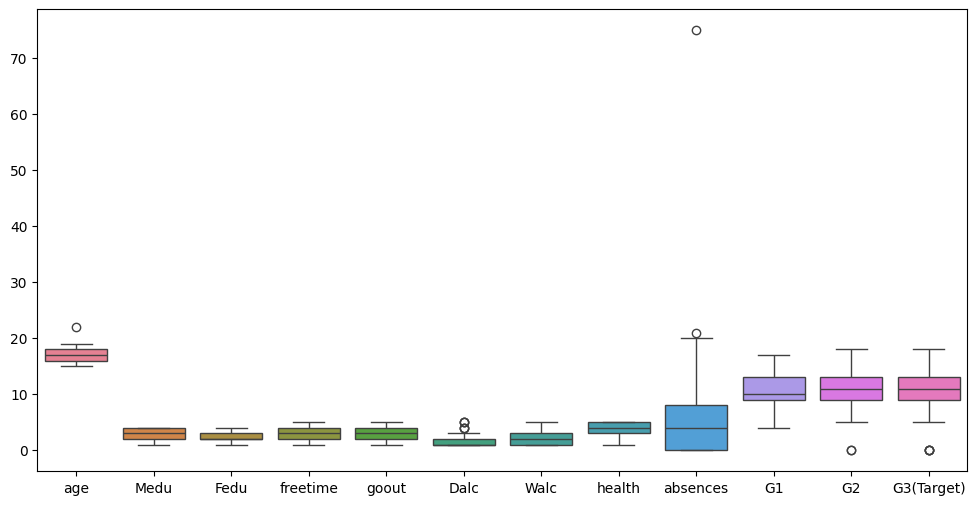

In [36]:
num_cols = ['age', 'Medu', 'Fedu', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3(Target)']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.show()

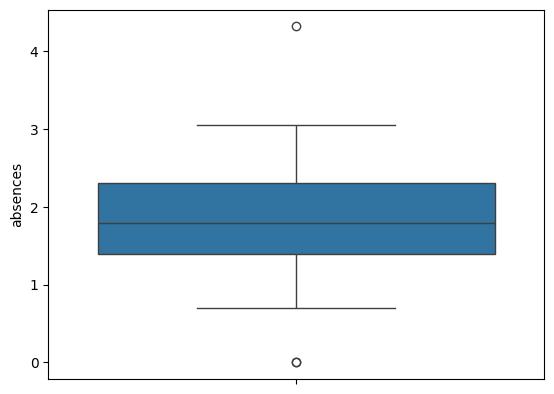

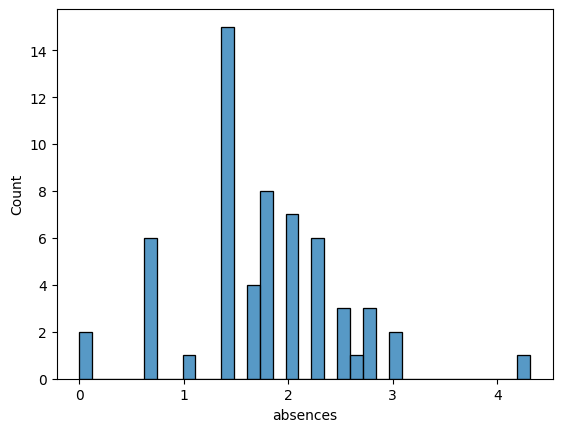

In [25]:
df['absences'] = np.log(df['absences'])

sns.boxplot(df['absences'])
plt.show()

sns.histplot(df['absences'], bins=35)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop('index', axis=1)
y = df['index']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((64, 33), (17, 33), (64,), (17,))

In [38]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3(Target)
811,GP,M,16.0,U,LE3,T,1.0,2.0,other,other,...,4.0,4.0,4.0,2.0,4.0,5.0,0.0,7.0,0.0,0.0
731,GP,F,15.0,U,LE3,T,3.0,2.0,services,other,...,NaN,4.0,4.0,1.0,1.0,5.0,10.0,7.0,6.0,6.0
549,MS,F,17.0,R,GT3,T,4.0,2.0,other,other,...,4.0,3.0,3.0,2.0,3.0,5.0,0.0,17.0,18.0,18.0
206,GP,M,17.0,U,GT3,T,1.0,2.0,at_home,services,...,NaN,4.0,4.0,4.0,5.0,5.0,16.0,10.0,11.0,12.0
848,GP,F,16.0,U,LE3,T,4.0,4.0,teacher,teacher,...,4.0,5.0,2.0,1.0,2.0,3.0,0.0,9.0,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,GP,F,19.0,U,GT3,T,2.0,2.0,services,services,...,4.0,3.0,3.0,1.0,1.0,5.0,0.0,10.0,10.0,11.0
786,GP,F,16.0,U,GT3,A,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,1.0,5.0,0.0,4.0,0.0,0.0
905,GP,F,17.0,U,LE3,T,4.0,2.0,teacher,services,...,NaN,2.0,3.0,1.0,1.0,4.0,6.0,14.0,12.0,13.0
244,GP,F,17.0,U,LE3,T,4.0,3.0,health,other,...,3.0,2.0,3.0,1.0,2.0,3.0,0.0,14.0,12.0,12.0


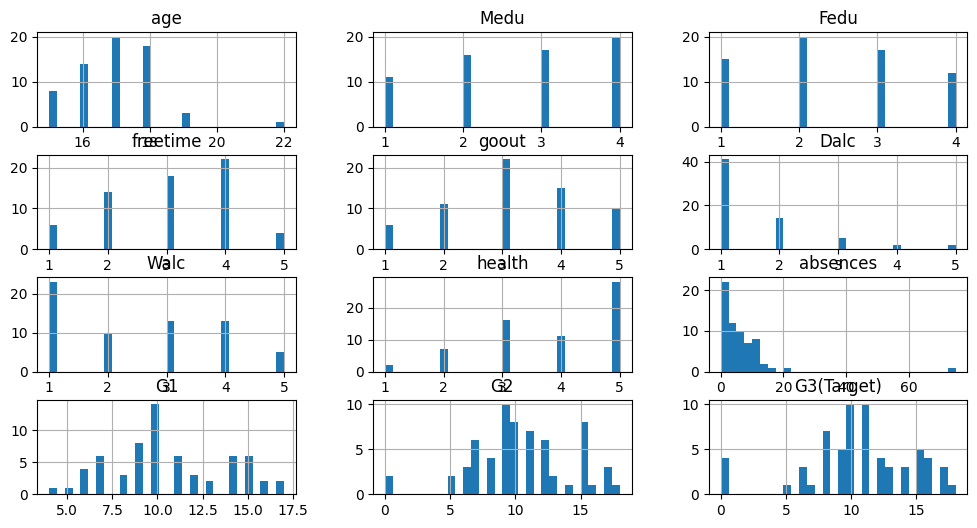

In [40]:
X_train[num_cols].hist(bins=30, figsize=(12,6))
plt.show()

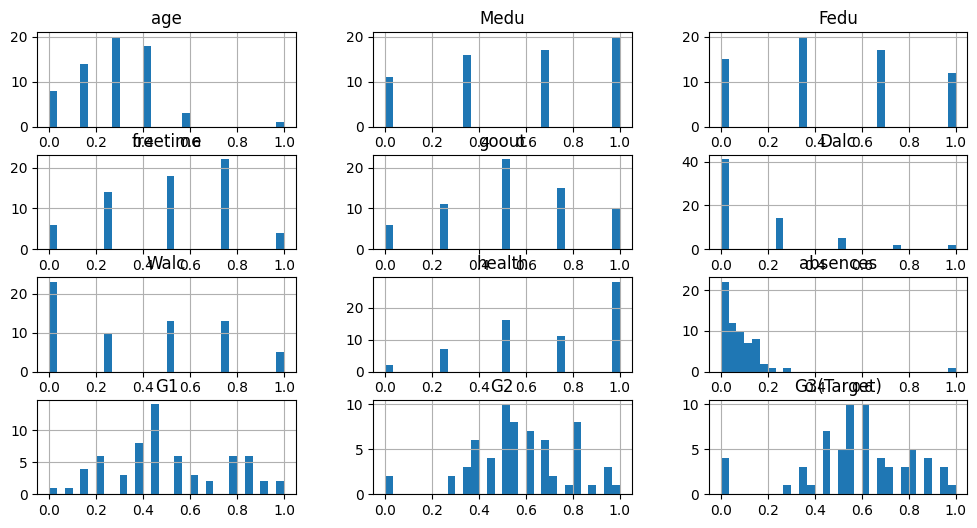

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train[num_cols].hist(bins=30, figsize=(12,6))
plt.show()

In [44]:
df.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


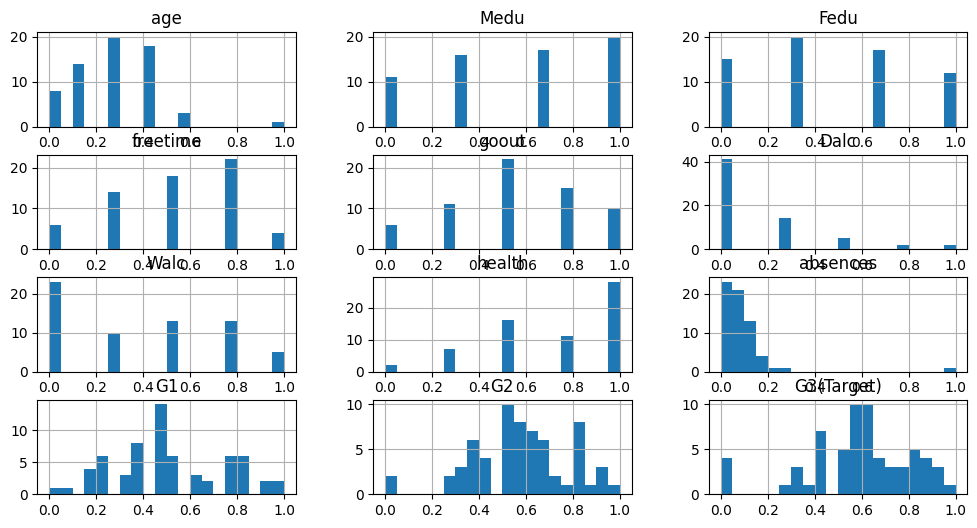

In [45]:
X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

In [46]:
X_train[num_cols] = X_train[num_cols].replace([np.inf, -np.inf], np.nan)
X_test[num_cols] = X_test[num_cols].replace([np.inf, -np.inf], np.nan)

X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].median())
X_test[num_cols] = X_test[num_cols].fillna(X_test[num_cols].median())

print(X_train[num_cols].isna().sum())
print(np.isinf(X_train[num_cols]).sum())

age           0
Medu          0
Fedu          0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3(Target)    0
dtype: int64
age           0
Medu          0
Fedu          0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3(Target)    0
dtype: int64


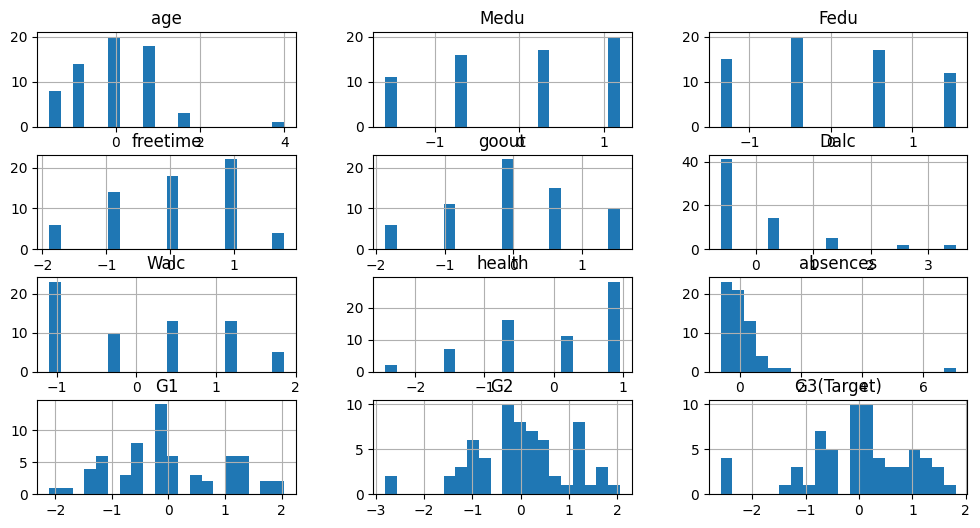

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

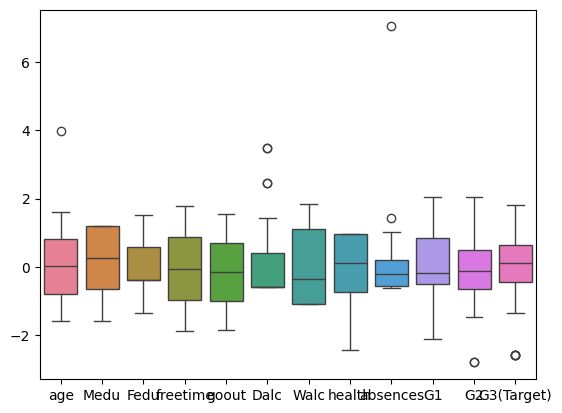

In [48]:
sns.boxplot(data=X_train[num_cols])
plt.show()

In [55]:
X_train['G1'].skew(), X_train['age'].skew()

(0.20020778551297128, 0.7567874334239127)

In [61]:
df.isna().sum().sort_values(ascending=False)

,0
famrel,15
failures,10
studytime,10
traveltime,7
school,0
nursery,0
internet,0
romantic,0
freetime,0
goout,0


In [62]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(X_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
school
GP    47
MS    17
Name: count, dtype: int64
--------------------------------------------------
sex
F    37
M    27
Name: count, dtype: int64
--------------------------------------------------
address
U    47
R    17
Name: count, dtype: int64
--------------------------------------------------
famsize
GT3    44
LE3    20
Name: count, dtype: int64
--------------------------------------------------
Pstatus
T    56
A     8
Name: count, dtype: int64
--------------------------------------------------
Mjob
other       19
services    16
at_home     13
teacher     11
health       5
Name: count, dtype: int64
--------------------------------------------------
Fjob
other       32
services    17
health       6
at_home      5
teacher      4
Name: count, dtype: int64
--------------------------------------------------
reason
course        27
reputation    16
home          12
other          9
Name: count, dtype: int64
----------------------------

In [63]:
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

X_train.head()

,age,Medu,Fedu,freetime,goout,Dalc,Walc,health,absences,G1,...,nursery_yes,higher_yes,internet_yes,romantic_yes,famrel_1.0,famrel_2.0,famrel_3.0,famrel_4.0,famrel_5.0,famrel_inf
811,-0.783652,-1.588375,-0.390020,0.861727,0.693889,0.414636,1.116271,0.953998,-0.628892,-1.152941,...,True,True,False,False,False,False,False,True,False,False
731,-1.579744,0.259916,-0.390020,0.861727,0.693889,-0.606006,-1.093255,0.953998,0.395258,-1.152941,...,True,True,True,False,False,False,False,False,False,False
549,0.012439,1.184062,-0.390020,-0.057448,-0.160128,0.414636,0.379762,0.953998,-0.628892,2.041354,...,False,True,True,False,False,False,False,True,False,False
206,0.012439,-1.588375,-0.390020,0.861727,0.693889,2.455919,1.852779,0.953998,1.009747,-0.194652,...,False,True,True,False,False,False,False,False,False,False
848,-0.783652,1.184062,1.530077,1.780903,-1.014145,-0.606006,-0.356746,-0.741999,-0.628892,-0.514082,...,True,True,True,False,False,False,False,True,False,False


In [65]:
X_train['Explicit Track'] = y_train
X_test['Explicit Track'] = y_test
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 811 to 706
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                64 non-null     float64
 1   Medu               64 non-null     float64
 2   Fedu               64 non-null     float64
 3   freetime           64 non-null     float64
 4   goout              64 non-null     float64
 5   Dalc               64 non-null     float64
 6   Walc               64 non-null     float64
 7   health             64 non-null     float64
 8   absences           64 non-null     float64
 9   G1                 64 non-null     float64
 10  G2                 64 non-null     float64
 11  G3(Target)         64 non-null     float64
 12  school_MS          64 non-null     bool   
 13  sex_M              64 non-null     bool   
 14  address_U          64 non-null     bool   
 15  famsize_LE3        64 non-null     bool   
 16  Pstatus_T          64 non-null

In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 422 to 940
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                17 non-null     float64
 1   Medu               17 non-null     float64
 2   Fedu               17 non-null     float64
 3   freetime           17 non-null     float64
 4   goout              17 non-null     float64
 5   Dalc               17 non-null     float64
 6   Walc               17 non-null     float64
 7   health             17 non-null     float64
 8   absences           17 non-null     float64
 9   G1                 17 non-null     float64
 10  G2                 17 non-null     float64
 11  G3(Target)         17 non-null     float64
 12  school_MS          17 non-null     bool   
 13  sex_M              17 non-null     bool   
 14  address_U          17 non-null     bool   
 15  famsize_LE3        17 non-null     bool   
 16  Pstatus_T          17 non-null

In [67]:
print("Train missing data:", X_train.isna().sum().sum(), "\nTest missing data:", X_test.isna().sum().sum())
print()
print("Train duplicated data:", X_train.duplicated().sum(), "\nTest duplicated data:", X_test.duplicated().sum())

Train missing data: 0 
Test missing data: 0

Train duplicated data: 0 
Test duplicated data: 0


data clean